In [1]:
import pandas as pd

In [2]:
code = pd.read_csv('data/corpgeneral.csv')
code

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,JS전선,5560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시
2,거북선6호,114140,NaN,NaN,2009-10-01,12월,김연신,NaN,제주특별자치도
3,교보메리츠,64900,NaN,"부동산 투자,운용",2002-01-30,12월,김 상 진,NaN,서울특별시
4,국제관광공사,28780,NaN,NaN,1966-03-18,12월,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3883,툴젠,199800,자연과학 및 공학 연구개발업,"유전자가위 (유전체 교정 도구) 및 이를 이용한 유전자세포치료제, 고부가가치 가축,...",2014-06-25,12월,"김영호, 이병화(각자 대표이사)",http://www.toolgen.com,서울특별시
3884,플럼라인생명과학,222670,자연과학 및 공학 연구개발업,"강아지암치료제,돼지DNA테라피",2015-07-28,12월,김앤토니경태,http://www.plsdna.com,서울특별시
3885,피엔에이치테크,239890,기초 화학물질 제조업,"OLED완성체, OLED중간체, Pd촉매",2016-08-16,12월,현서용,http://www.phtech.co.kr,경기도
3886,한국미라클피플사,331660,기타 화학제품 제조업,"은나노스텝, 닥터오렌지 등",2019-10-28,12월,이호경,http://www.kmpc.co.kr,경기도


In [3]:
code = code[['회사명', '종목코드']]
code_result = code.rename(columns={"회사명":"corp", "종목코드":"code"})
code_result

,corp,code
0,JS전선,5560
1,거북선2호,101380
2,거북선6호,114140
3,교보메리츠,64900
4,국제관광공사,28780
...,...,...
3883,툴젠,199800
3884,플럼라인생명과학,222670
3885,피엔에이치테크,239890
3886,한국미라클피플사,331660


In [4]:
corp_name = "카카오"
condition = "corp=='{}'".format(corp_name)
kakao = code_result.query(condition)
kakao = kakao['code']
kakao_string = kakao.to_string(index=False)
kakao_string = kakao_string.strip()
kakao_string = kakao_string.rjust(6, '0')
kakao_code = kakao_string + '.KS'
kakao_code

'035720.KS'

In [5]:
import pandas_datareader as pdr
kakao_stock_df = pdr.get_data_yahoo(kakao_code)
kakao_stock_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-14,19040.0,18600.0,18600.0,18820.0,1410610.0,18712.902344
2016-06-15,18800.0,18560.0,18780.0,18560.0,1244585.0,18454.382812
2016-06-16,18760.0,18180.0,18600.0,18240.0,1736960.0,18136.205078
2016-06-17,18480.0,18140.0,18340.0,18260.0,1268500.0,18156.091797
2016-06-20,18980.0,18300.0,18300.0,18980.0,1506930.0,18871.992188
...,...,...,...,...,...,...
2021-06-07,127000.0,125000.0,125000.0,126000.0,1905198.0,126000.000000
2021-06-08,128500.0,126500.0,127000.0,128500.0,2248373.0,128500.000000
2021-06-09,130000.0,128500.0,128500.0,129000.0,1936747.0,129000.000000


<AxesSubplot:xlabel='Date'>

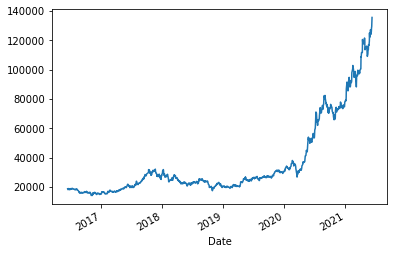

In [6]:
kakao_stock_df['Close'].plot()

In [7]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

In [8]:
code = pd.read_csv("data/corpgeneral.csv", header = 0)
code = code[['회사명', '종목코드']]
code = code.rename(columns={"회사명":"corp", '종목코드' : "code"})

In [9]:
def get_code(code_result, corp_name):
    condition = "corp == '{}'".format(corp_name)
    code = code_result.query(condition)['code'].to_string(index=False)
    code = code.strip()
    code =  code.rjust(6, "0")
    code = code + ".KS"
    return code


In [10]:
samsung_code = get_code(code, "삼성전자")
cj_code = get_code(code_result, "CJ")
cj_code

'001040.KS'

In [11]:
companies = ["삼성전자", "LG전자", "카카오", "NAVER", "CJ", "한화", '현대자동차', "기아자동차"]
start = datetime(2019, 1, 1)
end = datetime(2019, 12 , 31)

stocks_of_companies = pd.DataFrame({"Date":pd.date_range(start=start, end=end)}) 
stocks_of_companies

,Date
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
360,2019-12-27
361,2019-12-28
362,2019-12-29
363,2019-12-30


In [12]:
for company in companies:
    company_code = get_code(code_result, company)
    stock_df = pdr.get_data_yahoo(company_code, start, end)
    stocks_of_companies = stocks_of_companies.join(pd.DataFrame(stock_df['Close']).rename(columns={'Close':company}), on='Date')
stocks_of_companies

,Date,삼성전자,LG전자,카카오,NAVER,CJ,한화,현대자동차,기아자동차
0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,38750.0,62800.0,20400.0,118000.0,116000.0,31000.0,114000.0,32800.0
2,2019-01-03,37600.0,62900.0,20500.0,122000.0,118500.0,29950.0,116500.0,32850.0
3,2019-01-04,37450.0,62200.0,20700.0,125500.0,119500.0,29900.0,119500.0,34850.0
4,2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
360,2019-12-27,56500.0,71800.0,30700.0,183500.0,96400.0,25250.0,120500.0,44350.0
361,2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,2019-12-30,55800.0,72100.0,30700.0,186500.0,96600.0,25000.0,120500.0,44300.0


In [13]:
corr_data = stocks_of_companies.corr()
corr_data

,삼성전자,LG전자,카카오,NAVER,CJ,한화,현대자동차,기아자동차
삼성전자,1.000000,0.072774,0.678914,0.760835,-0.370804,-0.357820,-0.261648,0.483834
LG전자,0.072774,1.000000,-0.147646,-0.431879,0.493073,0.317671,0.371329,-0.070075
카카오,0.678914,-0.147646,1.000000,0.682700,-0.788729,-0.828159,0.014257,0.833377
NAVER,0.760835,-0.431879,0.682700,1.000000,-0.543533,-0.464186,-0.539871,0.377423
CJ,-0.370804,0.493073,-0.788729,-0.543533,1.000000,0.924626,-0.068346,-0.725753
한화,-0.357820,0.317671,-0.828159,-0.464186,0.924626,1.000000,-0.099603,-0.779787
현대자동차,-0.261648,0.371329,0.014257,-0.539871,-0.068346,-0.099603,1.000000,0.402249
기아자동차,0.483834,-0.070075,0.833377,0.377423,-0.725753,-0.779787,0.402249,1.000000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family']= "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='Date', ylabel='Close'>

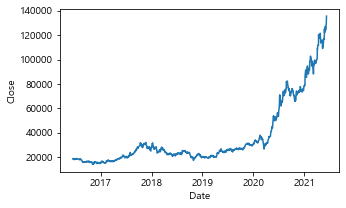

In [19]:
plt.figure(figsize=(5, 3))
sns.lineplot(data=kakao_stock_df['Close'])

<AxesSubplot:>

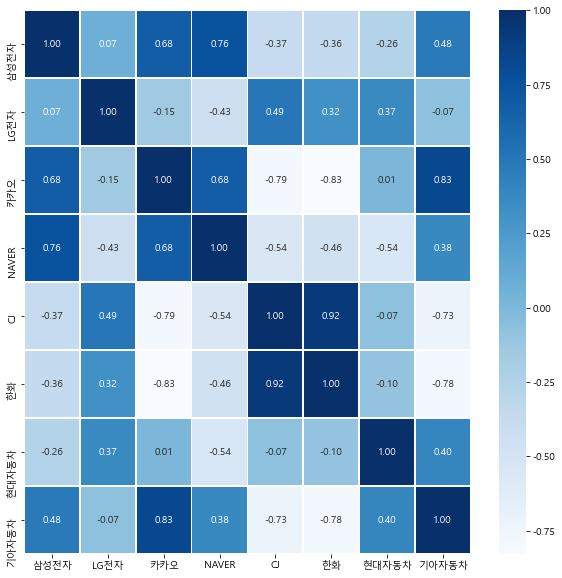

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=corr_data, annot=True, fmt = '.2f', linewidths=.5, cmap="Blues")

In [21]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

code = pd.read_csv('./data/corpgeneral.csv', header=0)
code = code[['회사명', '종목코드']]

# 컬럼명 바꾸기
code_result = code.rename(columns={'회사명': 'corp', '종목코드': 'code'})
# 종목 코드 6자리만들기
code_result.code = code_result.code.map('{:06d}'.format)

def get_code(code_result, corp_name):
    condition = "corp=='{}'".format(corp_name)
    code = code_result.query(condition)['code'].to_string(index=False)
    # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
    code = code.strip()
    return code

companies = ['삼성전자', 'LG전자', '카카오', 'NAVER', 'CJ', '한화', '현대자동차', '기아자동차']
start = datetime(2019,1,1)
end = datetime(2020,9,10)
stocks_of_companies = pd.DataFrame({'Date': pd.date_range(start=start, end=end)})

for company in companies:
    company_code = get_code(code_result, company) + '.KS'
    stock_df = pdr.get_data_yahoo(company_code, start, end)
    stocks_of_companies = stocks_of_companies.join(pd.DataFrame(stock_df['Close'].pct_change()).rename(columns={'Close':company}), on='Date')

stocks_of_companies.dropna()
stocks_of_companies.to_csv('./stock_change.csv',sep=',', na_rep='NaN',index = False)